In [178]:
# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Data
import pandas as pd
import numpy as np

# Visualize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
import imgkit

# Misc
import requests
import os

In [10]:
# Download the data
cur_dir_contents = os.listdir(os.getcwd())
if "housing.csv" not in cur_dir_contents:
    print("Requesting and writing data")
    res = requests.get("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv").content
    with open(os.path.join(os.getcwd(), "housing.csv"), "wb") as fobj:
        fobj.write(res)

In [6]:
# Load data and display head information
df = pd.read_csv(os.path.join(os.getcwd(), "housing.csv"))
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
# Display other information
display(df.info())
print()
display(df.describe())
print()
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
# Display counts of each attributes of a given feature
# .value_counts() => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

# Categorical
display(df["ocean_proximity"].value_counts())
print()

# Numerical example
display(df["latitude"].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.63      1
40.74      1
40.91      1
39.69      1
41.28      1
Name: latitude, Length: 862, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

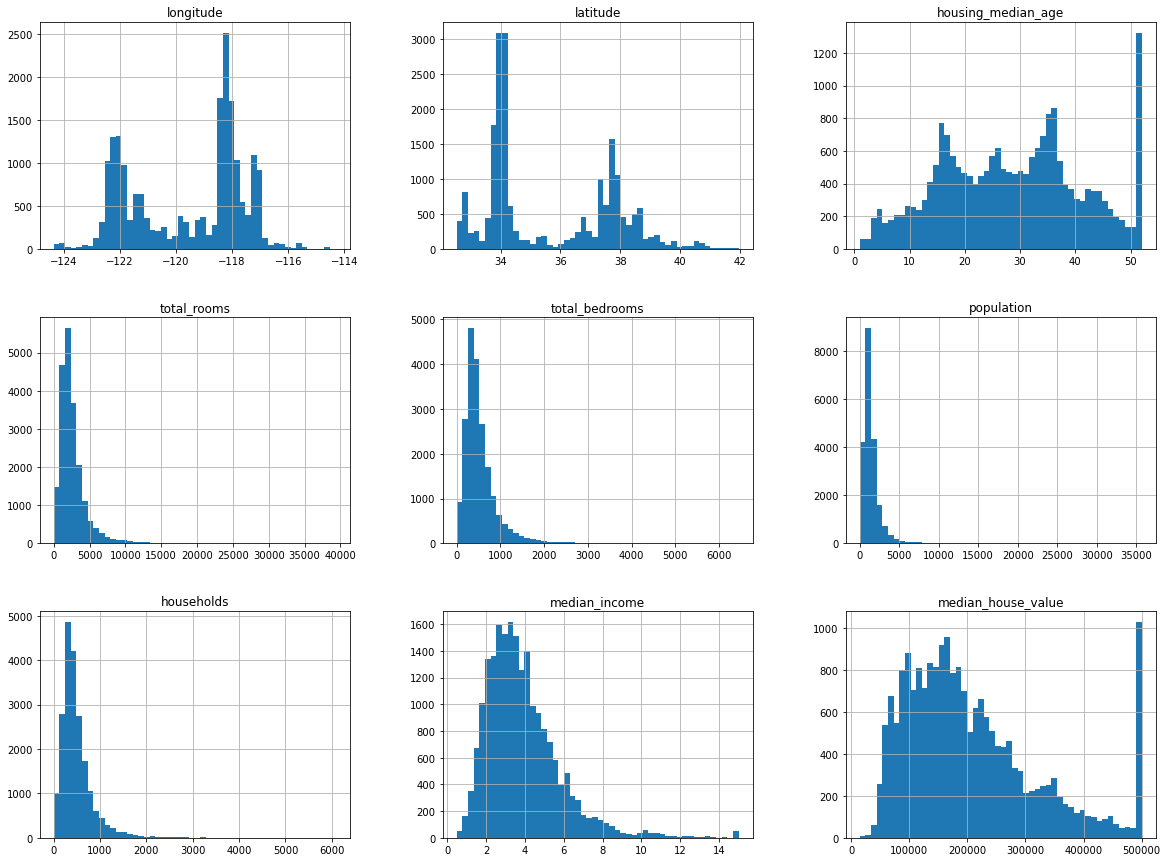

In [19]:
# Get histogram summary of data 
# .hist() => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
display(df.hist(bins=50, figsize=(20, 15)))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00



Saving:
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


<AxesSubplot:>

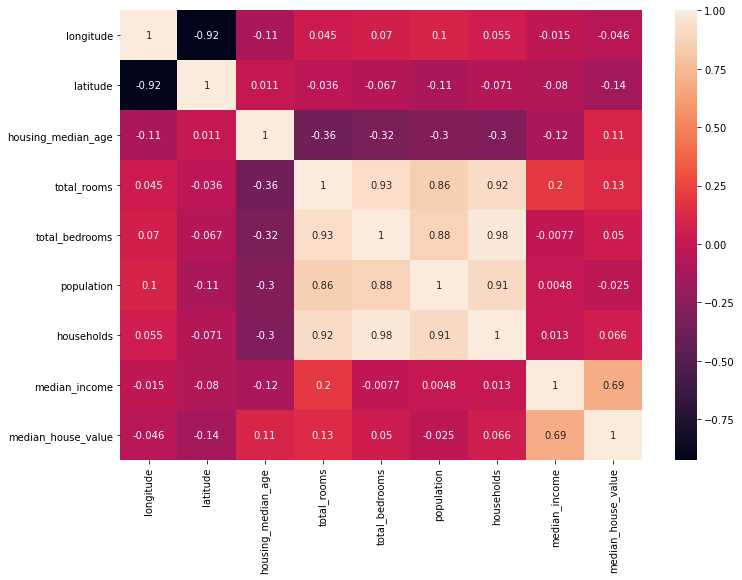

In [137]:
# Two ways to look at Correlation
corr = df.corr()

# ----------------------------
# (1) Simple numerical heat map
# source => https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
# ----------------------------

# Straightforward <class 'pd....Styler'>
simple_hmap_df = corr.style.background_gradient(cmap="coolwarm").set_precision(2)

# Save the html if not on file
html_simple_hmap = simple_hmap_df.render()
with open("./figures/simple_hmap.html", "w") as fobj:
    fobj.write(html_hmap)

# Display the html
display(simple_hmap)

# Save html to image
path_wkthmltoimage = r'C:\Program Files\wkhtmltopdf\bin\wkhtmltoimage.exe'
config = imgkit.config(wkhtmltoimage=path_wkthmltoimage)
print("\nSaving:")
imgkit.from_file("./figures/simple_hmap.html", "./figures/simple_hmap.jpg", config=config)

# -------------------
# (2) Larger heat map
# sources => https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36
#         => https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
# -------------------

# Create <class 'Figure'> and <class 'Axes'> objs
fig, ax = plt.subplots()

# Set size to letter paper
fig.set_size_inches(11.7, 8.27) 

# Heat map to populate <class 'Axes'> obj
sns.heatmap(corr, annot=True, ax=ax)

# Display the figure
display(ax)

# Save the figure and make sure text doesn't get cut-off
fig.savefig("./figures/sns_hmap.png", bbox_inches="tight")

<AxesSubplot:>

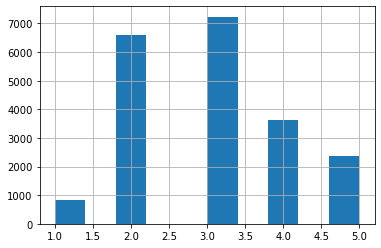

In [135]:
# Observe stratas to avoid sampling bias that could arise from strictly random splitting
# .cut() => https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
df["median_income_cat"] = pd.cut(x=df["median_income"], bins=[0.0, 1.5, 3., 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
display(df["median_income_cat"].hist())

In [146]:
# Playing with loc
display(df.loc[[0, 1]])
print()
display(df[0:2])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5


In [140]:
# Github more readable soln:
# source => https://github.com/ageron/handson-ml/issues/385
# Manual stratification of the sample based on bin
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(df, df["median_income_cat"]):
#     strat_train_set = df.loc[train_index]
#     strat_test_set = df.loc[test_index]

<generator object BaseShuffleSplit.split at 0x0000021EB3C4B0C8>

2    55
1    34
3    26
5    24
4    11
Name: median_income_cat, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

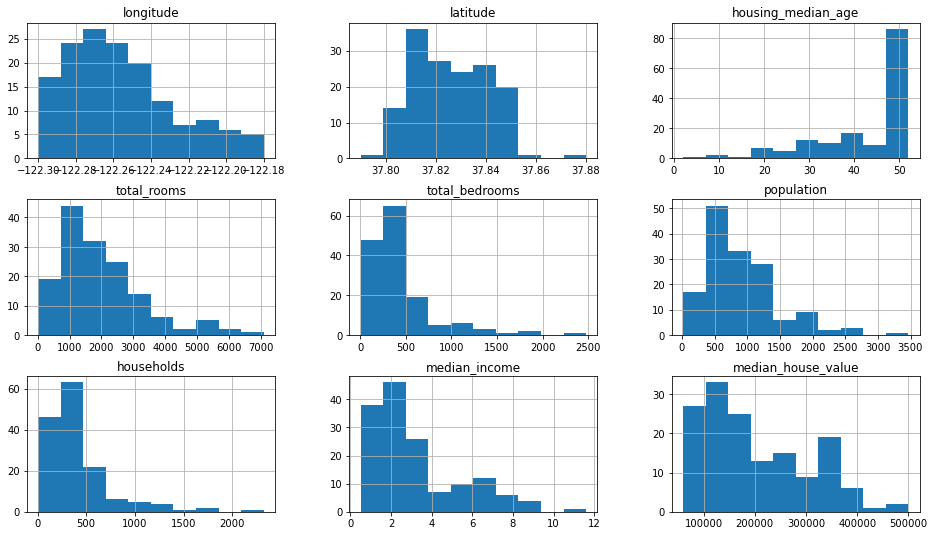

In [177]:
# Small data set and reminder of methods used
small_df = df[:150]
small_corr = small_df.corr()
display(small_df["median_income_cat"].value_counts())
print()
display(small_df.hist(bins=10, figsize=(16, 9)))

In [197]:
# Testing the train test split on a smaller data set
strat_train_set, strat_test_set = train_test_split(small_df, test_size=0.2, random_state=42, stratify=small_df["median_income_cat"])
print("Stratified training set:")
display(strat_train_set.info())
display(strat_train_set["median_income_cat"].value_counts())
print()
print("Stratified testing set:")
display(strat_test_set.info())
display(strat_test_set["median_income_cat"].value_counts())

Stratified training set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 66 to 78
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           120 non-null    float64 
 1   latitude            120 non-null    float64 
 2   housing_median_age  120 non-null    float64 
 3   total_rooms         120 non-null    float64 
 4   total_bedrooms      120 non-null    float64 
 5   population          120 non-null    float64 
 6   households          120 non-null    float64 
 7   median_income       120 non-null    float64 
 8   median_house_value  120 non-null    float64 
 9   ocean_proximity     120 non-null    object  
 10  median_income_cat   120 non-null    category
dtypes: category(1), float64(9), object(1)
memory usage: 10.6+ KB


None

2    44
1    27
3    21
5    19
4     9
Name: median_income_cat, dtype: int64


Stratified testing set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 4 to 28
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           30 non-null     float64 
 1   latitude            30 non-null     float64 
 2   housing_median_age  30 non-null     float64 
 3   total_rooms         30 non-null     float64 
 4   total_bedrooms      30 non-null     float64 
 5   population          30 non-null     float64 
 6   households          30 non-null     float64 
 7   median_income       30 non-null     float64 
 8   median_house_value  30 non-null     float64 
 9   ocean_proximity     30 non-null     object  
 10  median_income_cat   30 non-null     category
dtypes: category(1), float64(9), object(1)
memory usage: 2.8+ KB


None

2    11
1     7
3     5
5     5
4     2
Name: median_income_cat, dtype: int64

In [198]:
# Calculate the proportion of median_income_cat records in
# each respective set. Since this was the specified feature
# then this should be roughly equal between testing and training
train_series = strat_train_set["median_income_cat"].value_counts()
train_proportion_list = []
train_tot = train_series.sum()
for i in train_series:
    train_proportion_list.append(i/train_tot)
print("Proportion of each median income category in stratified training set:")
print(list(train_series.index.values))
print(train_proportion_list)

print()

test_series = strat_test_set["median_income_cat"].value_counts()
test_proportion_list = []
test_tot = test_series.sum()
for i in test_series:
    test_proportion_list.append(i/test_tot)

print("Proportion of each median income category in stratified testing set:")
print(list(test_series.index.values))
print(test_proportion_list)

Proportion of each median income category in stratified training set:
[2, 1, 3, 5, 4]
[0.36666666666666664, 0.225, 0.175, 0.15833333333333333, 0.075]

Proportion of each median income category in stratified testing set:
[2, 1, 3, 5, 4]
[0.36666666666666664, 0.23333333333333334, 0.16666666666666666, 0.16666666666666666, 0.06666666666666667]
